<a href="https://colab.research.google.com/github/sohamgeek/bmllca/blob/main/bml_lca_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Model Performance
Best KNN Accuracy: 65.31%
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.69      0.76      0.72       130
           6       0.62      0.65      0.64       132
           7       0.63      0.57      0.60        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.33      0.33       320
weighted avg       0.62      0.65      0.64       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


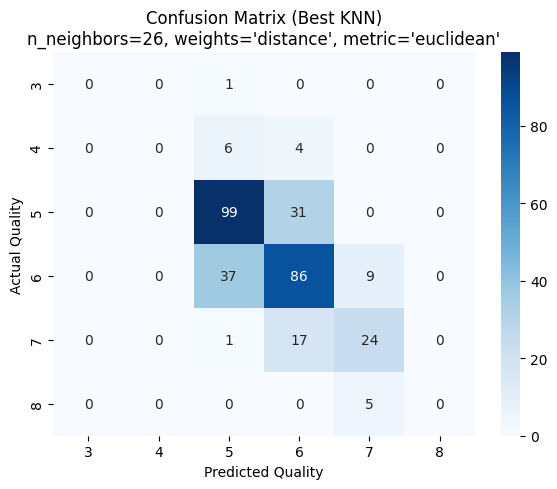

In [12]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Load Dataset
file_path = '/content/winequality-red.csv'  # Update path if needed
df = pd.read_csv(file_path, delimiter=';')

# Step 3: Data Preprocessing
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 5: KNN Model Training with GridSearch
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

#Step 6: Model Evaluation
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Model Performance")
print(f"Best KNN Accuracy: {accuracy * 100:.2f}%")
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix with Best Parameters in Title
cm = confusion_matrix(y_test, y_pred)

best_params_str = f"n_neighbors={grid_search.best_params_['n_neighbors']}, " \
                  f"weights='{grid_search.best_params_['weights']}', " \
                  f"metric='{grid_search.best_params_['metric']}'"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.title(f"Confusion Matrix (Best KNN)\n{best_params_str}")
plt.tight_layout()
plt.show()
